<a href="https://colab.research.google.com/github/LeeYoungWook/dd/blob/master/3%EC%9E%A5_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%98%EB%8A%94_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ch03.파이토치로 구현하는 ANN**

# **#3.1 텐서와 autograd**

#    3.1.1 텐서를 알아보자

    *   랭크0텐서: 숫자가 하나인 스칼라
    *   랭크1텐서: 숫자를 일려로 나열
    *   랭크2텐서: 2차원 행렬=nxm행렬
    *   랭크3텐서: 3차원 행렬
    *   랭크n텐서: n차원 행렬












In [0]:
#랭크2텐서: 2차원 3x3행렬 표현해보기
import torch
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


*   unsqueeze squeeze view로 텐서의 랭크와 shape 바꿔보기 

    *   텐서의 원소 수는 그대로 유지하면서 차원과 모양을 조절할 수 있다.
    *   원소수를 바꾸려하면 에러가 난다.





In [0]:
# unsqueeze 로 랭크 올리기 -> [ ] 한쌍이 늘어남
x = torch.unsqueeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [0]:
#squeeze 로 랭크 줄이기 -> [ ] 한쌍이 사라짐
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape) 
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [0]:
# view로 랭크 줄이기 -> 랭크1로 바뀜
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [0]:
#원소가 9개인 텐서를 2x4 즉, 원소가 8개인 텐서로 바꾸려 할때 에러가 난다.
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력

shape '[2, 4]' is invalid for input of size 9


#   3.1.2 텐서를 이용한 연산과 행렬곱

    *   A.B라는 두 행렬곱을 하려면 A행렬의 열과, B행렬의 행이 같아야한다. 
    *   A*B행렬의 행 개수는 A와 같고, 열의 개수는 B와 같다.

In [0]:
#무작위 5x3인 무작위 행렬w과 / 3x2행렬인 x를 행렬곱해본다.
import torch

w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)


w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[-1.0153, -1.4181, -0.6013],
        [-0.3102,  0.6347, -1.5241],
        [-0.7431,  0.7808,  0.2890],
        [-0.6492, -0.2625, -0.1983],
        [-1.9717, -0.4152, -0.3936]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [0]:
# w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
wx = torch.mm(w,x) 
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ -8.2761, -11.3107],
        [ -6.0265,  -7.2260],
        [  3.0442,   3.3708],
        [ -2.4283,  -3.5383],
        [ -5.1855,  -7.9660]])


In [0]:
# 5x2 무작위 행렬 b와 wx와 행렬의 합을 해본다.
b = torch.randn(5,2, dtype=torch.float)
print("b:", b.size())
print("b:", b)
b: torch.Size([5, 2])
b: tensor([[ 0.0527, -0.6271],
        [ 2.0694, -0.1230],
        [-0.0547, -1.9402],
        [ 1.5693,  0.8898],
        [ 0.2837,  1.1724]])

In [0]:
# 무작위 함수 w . b때문에 결과가 항상 다르게 나온다.
result = wx + b	
print("result size:", result.size()) 
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[ -9.0950, -10.3773],
        [ -6.1578,  -8.0850],
        [  2.8345,   3.7531],
        [ -1.7689,  -3.3337],
        [ -6.6929,  -7.9551]])


#  3.1.3 Autograd (자동기울기) 알아보기

> 수식의 기울기를 자동으로 계산한다.

    *   거리 : 머신러닝의 예측 결과와 실제 데이터의 차이
    *   오차 : 거리들의 평균 

> 오차가 작은 머신러닝 모델일수록 더 정확하다.


 



*   경사하강법에 대해 알아보기
> 함수를 미분하여 기울기를 구해 오차의 최소값이 있는 방향을 찾아내는 알고리즘으로 Autograd로 구현할 수 있다.






In [0]:
# 값이 1.0인 스칼라 텐서 w를 정의하고, requires_grad를 True로 설정하여 Autograd 기능이 자동으로 계산할 때 w에 대한 기울기를 저장한다.

import torch
w = torch.tensor(1.0, requires_grad=True)
a = w*3 
l = a**2 # I=a^2=9w^2
l.backward()  # backward()함수로 a와 w를 차례로 미분한다.
print(w.grad)
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


# **#3.2 경사하강법으로 이미지 복원하기**





# 3.2.1 오염된 이미지 복원하기

1.   오염된 이미지와 크기가 같은 랜덤 텐서를 생성한다.
2.   랜덤 텐서를 버그가 발생한 weird_function() 함수에 입력해 똑같이 오염된 이미지를 '가설'한다.

3.   가설과 오염된 이미지가 같다면, 무작위 이미지와 원본 이미지도 같을 것이다.
4.   그러므로 weird_funtion(랜덤텐서)=broken_image 관계가 성립하도록 만든다.

---


*   가설 이미지와 원본 이미지 사이의 거리가 오차다
*   Autograd를 이용하여 기울기가 작아지는 방향을 찾아 오차값이 최솟값이 되도록 랜덤 탠서를 바꿔준다

---











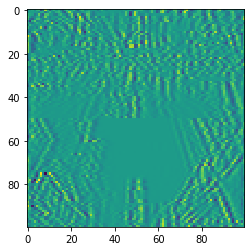

In [0]:
# pickle : 오염된 이미지 파일을 로딩하는데 사용하는 라이브러리
# matplotlib=plt : 오염된 이미지와 복원된 이미지를 출력하는데 사용하는데 라이브러리 
# 랭크1의 10000개의 원소인 broken_image을 맷플롯립을 이용해서 랭크2 (100 100) 행렬로 나타낸다.

import torch
import pickle
import matplotlib.pyplot as plt
broken_image =  torch.FloatTensor( pickle.load(open('/content/drive/My Drive/Colab Notebooks/broken_image_t.p', 'rb'),encoding='latin1' ) )
plt.imshow(broken_image.view(100,100))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#이미지를 오염시키는 weird_funtion() 함수

def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [0]:
# broken 이미지와 같은 랭크와 모양인 랭크2 (100 100) 무작위 랜덤텐서를 생성한다.

random_tensor = torch.randn(10000, dtype = torch.float)

In [0]:
# weiid_function() 함수에 무작위 텐서를 넣어서 얻은 가설 텐서와 오염된 이미지 사이의 거리를 구할 torch.dist() 함수를 구현한다.

def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

**경사하강법으로 여러 번 반복해서 최솟점을 찾아가는데 이 때,
학습을 어느 정도로 할지 학습률을 설정한다**


*   학습률이 너무 크면 최소값을 찾지 못하고 지나치게 되고
*   학습률이 너무 작으면 속도가 너무 느려서 적당한 학습률 설정이 하다





In [0]:
# Ir= 0.8로 학습률 설정

lr = 0.8

# 랜덤 텐서의 requires_grad를 True로 설정하여 오차 함수를 랜덤 텐서로 미분 할 수 있게 준비한다...

for i in range(0,20000):
    random_tensor.requires_grad_(True)
    
# 랜덤 텐서를 weird_function() 함수에 넣어 가설을 구한다.
# distance_loss()함수에 가설과 broken image를 넣어 오차를 계산한다.
# backward() 함수로 오차를 랜덤 텐서로 미분한다

    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()

# 파라미터(가중치)가 모두 같다면 최종 손실값에 대한 미분값도 모두 같아지기 때문에 torch.no_grad() 함수로 가중치를 적절한 값들로 초기화한다...

    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad

# 계산한 오차의 기울기값에는 최댓값으로 가는 방향이 들어 있기때문에, 반대방향으로 가도록 학습률만큼 이동시킨다. 

    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.229721069335938
Loss at 1000 = 1.1395131349563599
Loss at 2000 = 0.5586321353912354
Loss at 3000 = 0.390069842338562
Loss at 4000 = 0.3100281357765198
Loss at 5000 = 0.2613084018230438
Loss at 6000 = 0.22642190754413605
Loss at 7000 = 0.19859491288661957
Loss at 8000 = 0.17482830584049225
Loss at 9000 = 0.15364791452884674
Loss at 10000 = 0.134249746799469
Loss at 11000 = 0.11614996194839478
Loss at 12000 = 0.09903232008218765
Loss at 13000 = 0.0826781839132309
Loss at 14000 = 0.0669296458363533
Loss at 15000 = 0.051670417189598083
Loss at 16000 = 0.03681526333093643
Loss at 17000 = 0.02230466529726982
Loss at 18000 = 0.021163295954465866
Loss at 19000 = 0.02116706781089306


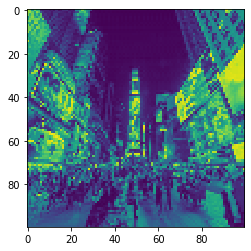

In [0]:
# 1000번 계산할때마다 오차를 출력해서 이미지를 복원한다.

plt.imshow(random_tensor.view(100,100).data)

# **# 3.3 신경망 모델 구현하기**




# **3.3.1 인공 신경망(ANN)**



> 인간의 뇌, 혹은 신경계의 작동 방식을 참고하여, 수학적 연산으로 입력된 자극을 처리하는 인공 뉴런이다.


![1](https://raw.githubusercontent.com/LeeYoungWook/duddnr0817/360cbfd258e568fe1acf27d809a4fcde825fae05/1.PNG?token=AOONVD2HH6FTGNL4KXXLCG26HE674)




*   입력층 : 자극을 입력받는 부분
*   은닉층 : 자극을 전달하는 과정이 일어나는 부분
*   출력층 : 자극이 반응으로 나타나는 부분




---
![2](https://raw.githubusercontent.com/LeeYoungWook/duddnr0817/a4a2eda9d2d54d937159413fe0dcb61c56b67028/2.PNG?token=AOONVD7QS44WH4DDJYG552S6HE7DGG)



> 즉, 각 층에 존재하는 매개변수인 가중치에 형랠곱하고 편향을 더해서 활성화 함수를 거쳐서 결과값을 만들어내는 것이다.


> 결과값과 정답사이의 오차를 계산하여, 역전파 알고리즘을 통해 출력층의 가중치부터 입력층의 가중치까지 뒤에서 부터 모두 경사하강법을 통해 조정해서 정답에 가까워져야 한다.








# **3.3.2 분류 모델 구현하기**



*   0과 1로 된 정답을 가진 데이터셋을 생성해서 신경망 모델을 학습하여 입력된 데이터를 0과 1중 알맞은 카테고리로 분류해본다.




In [0]:
# 넘파이: 행렬과 백터 연사에 유용한 수치해석용 라이브러리
# 사이킷런: 머신러닝용 라이브러리로 
# 넘파이와 사이킷런으로 학습 데이터를 만든다.

# 맷플릇립: 학습 데이터의 분포와 패턴을 시각화 하는데 사용

import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [0]:
# train 데이터셋은 신경망 학습에 쓰인다
# test 데이터셋은 학습이 끝난 신경망의 성능을 평가하고 실험한다.
# make_blobs() 함수는 데이터를 2차원 백터로 만들어 준다

n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [0]:
#4개의 레이블을 2개로 합쳐서 기본적인 모델을 구현한다.
#label_map()함수로 0,1 데이터는 전부 0번 레이블로 
#                  2,3 데이터는 전부 1번 테이블로 바꿔준다.

def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

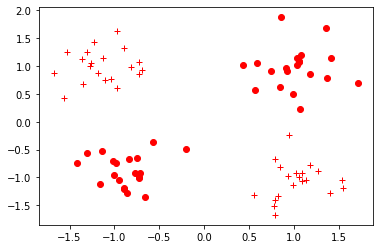

In [0]:
#맷플릇립으로 데이터가 제대로 만들어지고 레이블링됬는지 확인한다.
#왼쪽 아래와 오른쪽 위 데이터는 0을 레이블로
#오른쪽 아래와 왼쪽 위는 1을 레이블로 갖게 된다.

def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [0]:
#넘파이 백터 형식 데이터를 파이토치 텐서로 바꿔준다

x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [0]:
#신경망의 구조와 동작을 정의한다.

#nn_Module로 파이토치의 각종 도구를 사용한다
#___init___() 함수로 객체의 속성값을 초기화한다.
#super() 함수로 nn_Module 클래스의 속성을 초기화한다.  .
#input_size 신경망에 입력되는 데이터
#hidden_size 입력된 데이터는 중간층을 지나 출력층으로 전달된다

class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size

#linear_1 은  [self.input_size, self.hidden_size] 크기의 가중치를 행렬곱하고 편향을 더 하여 [1. hidden_size] 꼴의 텐서를 만든다.

            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)

#활성화 함수인 ReLU로 입력값이 0 보다 작으면 0 ,  0보다 크면 그대로 출력한다.            
            
            self.relu = torch.nn.ReLU()

#linear_2 은 [self hidden_size, 1] 크기의 가중치를 행렬곱하고 편향을 더하여 [1, 1] 꼴의 텐서를 만든다

            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)

#0과 1사이의 임의의 수로 제한해주는 시그로이드 함수에 통과시켜 결과값이 0과 1에 중 어디에 가까운지 알 수 있다.

            self.sigmoid = torch.nn.Sigmoid()
            
#forward() 함수로 정의한 동작들을 차례로 실행한다.

        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)
            return output

In [0]:
# 실제로 신경망 객체를 생성하고 학습에 필요한 변수와 알고리즘을 정의한다.

# input을 2 hidden을 5로 설정한다

model = NeuralNet(2, 5)

#학습률을 설정 0/03으로 설정한다.

learning_rate = 0.03

#파이토치에서 제공하는 오차 함수 중 1가지인 BCELoss()함수를 사용한다.

criterion = torch.nn.BCELoss()

#학습을 얼마나 할지 설정한다.

epochs = 2000

#파이토치에서 제공하는 확률적 경사하강법(SGD) 를 사용하겠다. 
#optimizer은 가중치를 학습률만큼 갱신한다 (가중치를 갱신하지 않으면 값이 그대로다)

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [0]:
# 사용할 모델의 성능을 시험해보겠다 
# squeeze()함수로 차원을 맞춰주고 item() 함수로 텐서 속의 숫자를 스칼라 값으로 변환한다.
-> 오차가 0.73 -> 100번중 73번 틀린다= 쓸모없다

model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7322440147399902


# 3.3.3 이제 신경망을 학습시켜 성능을 개선해보겠다

In [0]:
# 이폭만큼 반복하는것을 입력한다.

for epoch in range(epochs):

# train()함수로 학습 모드로 바꿔주고 zero_grad()함수로 경사값(기울기)를 0으로 설정한다
# 경사값을 0으로 안해주면 최소나 최대를 향해 간다. 

    model.train()
    optimizer.zero_grad()

#학습 데이터를 입력하여 결과값을 계산한다

    train_output = model(x_train)

#결과값을 squeeze함수로 랭크를 늘려서 레이블과 같은 차원으로 만들고 오차를 계산한다.

    train_loss = criterion(train_output.squeeze(), y_train)

#100번 입력마다 오차를 출력한다.

    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))

# 역전파를 수행한다. 
# 오염된 이미지를 복원할때 처럼 optimizer 함수를 이용해서
# 오차를 가중치로 미분하여 오차가 최소가 되는 방향을 구하고, 그 방향으로 모델을 학습률만큼 이동시킨다.    
    
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.02021796628832817
Train loss at 100 is 0.019037406891584396
Train loss at 200 is 0.01798918843269348
Train loss at 300 is 0.017052089795470238
Train loss at 400 is 0.01620939001441002
Train loss at 500 is 0.015447581186890602
Train loss at 600 is 0.014757370576262474
Train loss at 700 is 0.014128495939075947
Train loss at 800 is 0.013552183285355568
Train loss at 900 is 0.013021977618336678
Train loss at 1000 is 0.012532505206763744
Train loss at 1100 is 0.012079224921762943
Train loss at 1200 is 0.011658348143100739
Train loss at 1300 is 0.011266346089541912
Train loss at 1400 is 0.010900299064815044
Train loss at 1500 is 0.010557673871517181
Train loss at 1600 is 0.010236275382339954
Train loss at 1700 is 0.009934132918715477
Train loss at 1800 is 0.00964963249862194
Train loss at 1900 is 0.009381232783198357


In [0]:
# train모델에서 평가모델로 바꾸고 x_test와 y_test로 오차를 구한다. 
# ->오차가 0.003으로 매우 많이 줄었다.

model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test) 
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.0033163174521178007


In [0]:
#학습된 모델을 가중치 텐서와 평향 텐서로 표현하는 state_dict 함수 형태로 바꾼후 파이썬 형식으로 저장한다.

torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.0304,  0.0374],
        [ 0.6067, -0.3241],
        [-0.5429,  0.2352],
        [ 0.3032, -0.1532],
        [ 0.4456, -0.5222]])), ('linear_1.bias', tensor([ 0.5182, -0.3648,  0.2452,  0.5576, -0.6785])), ('linear_2.weight', tensor([[-0.4092,  0.3565, -0.2814, -0.3623, -0.0515]])), ('linear_2.bias', tensor([-0.1192]))])


In [0]:
#이제 언제든지 저장한 파일을 읽어들여 새로운 신경망 객체에 이미 학습된 모델의 가중치를 곧바로 적용할 수 있다.

new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9979609251022339
